# ARMA Models in StatsModels - Lab

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset.


## Objectives

In this lab you will:

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them
- Fit an ARMA model using StatsModels

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data.

<Axes: xlabel='year'>

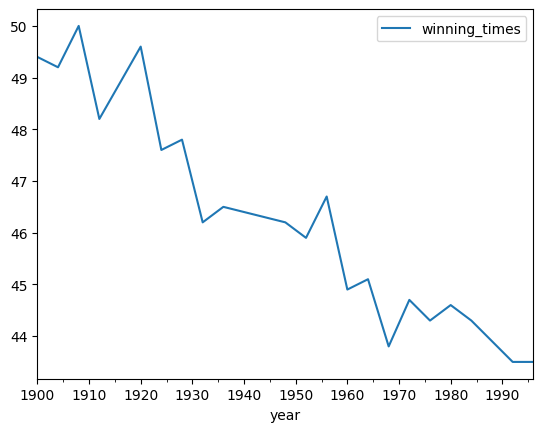

In [3]:
# Plot the time series
data.plot()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series.

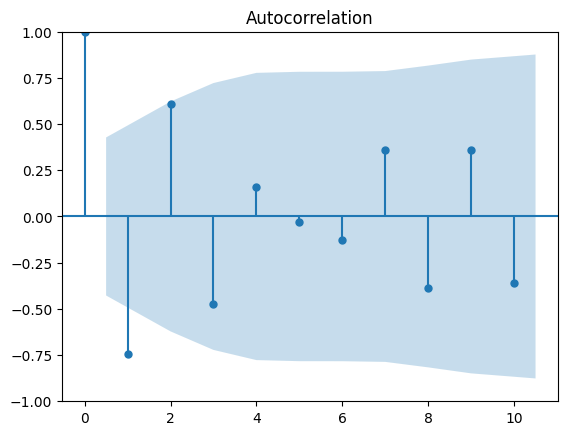

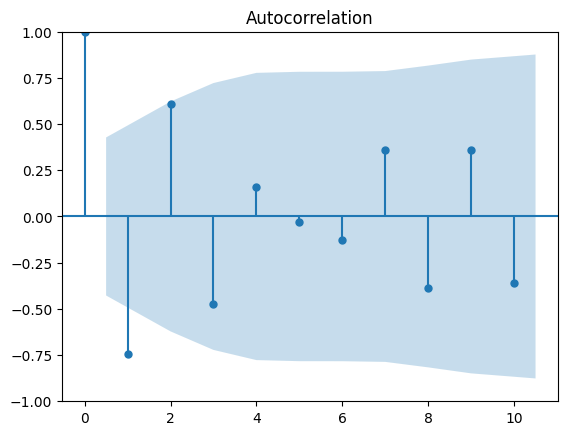

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)

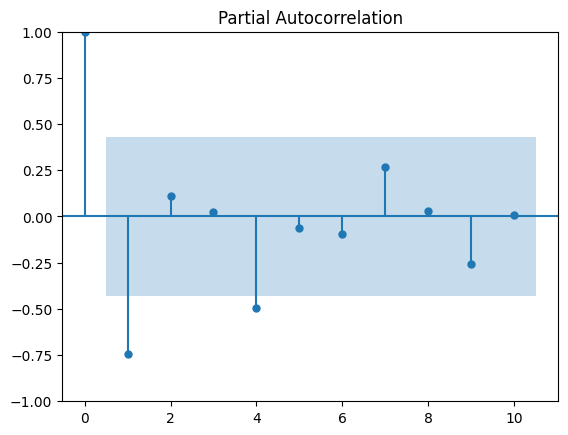

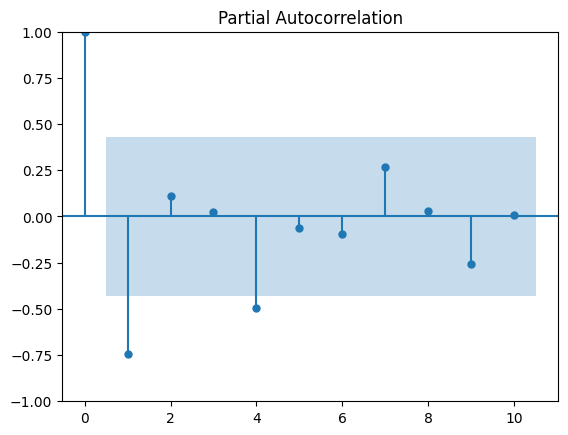

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_diff)

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [16]:
# Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.
from statsmodels.tsa.arima.model import ARIMA
# Model 1: ARIMA(1, 0, 1)
model1 = ARIMA(data_diff, order=(1, 0, 1))
results1 = model1.fit()
print(results1.summary())



                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Thu, 27 Jun 2024   AIC                             47.916
Time:                        08:49:57   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.6

In [17]:
# Model 2: ARIMA(2, 0, 1)
model2 = ARIMA(data_diff, order=(2, 0, 1))
results2 = model2.fit()
print(results2.summary())


                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Thu, 27 Jun 2024   AIC                             49.862
Time:                        08:50:13   BIC                             55.084
Sample:                    12-31-1904   HQIC                            50.995
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6102      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1280      1.848      0.069      0.9

In [18]:
# Model 3: ARIMA(1, 0, 2)
model3 = ARIMA(data_diff, order=(1, 0, 2))
results3 = model3.fit()
print(results3.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -19.076
Date:                Thu, 27 Jun 2024   AIC                             48.152
Time:                        08:50:49   BIC                             53.374
Sample:                    12-31-1904   HQIC                            49.285
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2784      0.154     -1.811      0.070      -0.580       0.023
ar.L1         -0.4716      0.256     -1.842      0.065      -0.973       0.030
ma.L1         -0.0097      0.267     -0.036      0.9

## What is your final model? Why did you pick this model?

In [20]:
# Your comments here
print("Model 1 (ARIMA(1, 0, 1))")

Model 1 (ARIMA(1, 0, 1))


Based on the AIC and BIC values, lower values indicate a better fit. Among the three models, Model 1 (ARIMA(1, 0, 1)) has the lowest AIC (47.916) and BIC (52.094), indicating that it provides the best balance of model fit and complexity.

Furthermore, Model 1 also has a significant AR term (AR1) and a relatively lower log likelihood compared to the others, suggesting a better overall fit to the data.

## Summary

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models.